## Author: Fang Jung(Kristy) Lin 
## Purpose: Regression Analysis (Australia data set)

# Import necessary packages

In [0]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Purpose for the analysis

### 1. Remove/manipulate/transform features from the data set, remain only useful data 
### 2. Graphically and numerically describe model performance and find the relation between them
### 3. Apply regression analysis techniques and EDA principles to find out what features will influence the rental price.





# Part 1. Data Acquisition and Rudimentary Analysis
The actual path to downloadable CSV is: https://docs.google.com/spreadsheets/d/e/2PACX-1vTq6-2yKdGF9JxzitqWripiZ38lWLCVEoWT9JT1kqUDy8S5uPYgsgHKWOShXZaP3mwqm5KGa1d3PxWo/pub?gid=155106628&single=true&output=csv


In [0]:
# Read data from Google Sheet
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTq6-2yKdGF9JxzitqWripiZ38lWLCVEoWT9JT1kqUDy8S5uPYgsgHKWOShXZaP3mwqm5KGa1d3PxWo/pub?gid=155106628&single=true&output=csv'
aus_df = pd.read_csv(data_path)

# Explore the data
aus_df.head()

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,3363954,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0
2,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,$141.00,Entire home/apt,1.0,1.0,1.0
3,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.29,$50.00,Private room,4.0,4.0,3.0
4,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.85,$52.00,Private room,1.0,1.0,1.0


### Perform light data modifications (Remove columns that are not necessary to the study)

Columns to be dropped: 

*   id - No practical usage for the dataset







In [0]:
aus_df = aus_df.drop(columns = ['id'])
aus_df.head()

,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0
2,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,$141.00,Entire home/apt,1.0,1.0,1.0
3,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.29,$50.00,Private room,4.0,4.0,3.0
4,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.85,$52.00,Private room,1.0,1.0,1.0


### Interpret the data

In [0]:
list(aus_df)

['country',
 'state',
 'neighbourhood_cleansed',
 'property_type',
 'square_meters',
 'price',
 'room_type',
 'bathrooms',
 'bedrooms',
 'beds']

Dataset Interpretion:

*  country - The country in which the listing resides.
*  state - The state in which the listing resides.
*  neighbourhood_cleansed - A modified version of the neighborhood that can be used for grouping.
*  property_type - The type of property that is being listed (e.g., House).
*  square_meters - A unit of area equal to a square one meter on each side, the dimension of the property
*  price - The cost of the rental per night in USD.
*  room_type - The type of room that is available for rent (e.g., a private room).
*  bathrooms - The count of bathrooms available (e.g., 1, 2, 1.5).
*  bedrooms - The count of bedrooms available (e.g., 0, 1, 2).
*  beds - The count of beds available in the rental (e.g., 1, 2, 3).






### Explore the quantative variables (e.g., price)

A few explorations:
*   The max price for a rental is 11.5K - it's much higher than the mean 802 rental price. It must be some rental!
*   There is an entry for a 1 dollar rental - it does not seem right.
*   The median price for a rental is 509 - it's below the mean of 802, suggesting a positive skew
*   Theere is an entry for a 0 square meters rental property - it does not seem right.
*   The max square meters of the rental property is 208.7 - it's much higher than the mean 32.7. It must be a huge place which need more investigate.









In [0]:
# Explore the data type
aus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 3974 non-null   object 
 1   state                   3781 non-null   object 
 2   neighbourhood_cleansed  3974 non-null   object 
 3   property_type           3974 non-null   object 
 4   square_meters           3974 non-null   float64
 5   price                   3974 non-null   object 
 6   room_type               3974 non-null   object 
 7   bathrooms               3969 non-null   float64
 8   bedrooms                3972 non-null   float64
 9   beds                    3973 non-null   float64
dtypes: float64(4), object(6)
memory usage: 310.6+ KB


In [0]:
# Change the price data type to float
aus_df[aus_df.columns[5]] = aus_df[aus_df.columns[5]].replace('[\$,]', '', regex=True).astype(float)
aus_df.head()

,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,2900.0,Entire home/apt,3.0,4.0,4.0
1,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,28.0,Private room,1.0,1.0,1.0
2,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,141.0,Entire home/apt,1.0,1.0,1.0
3,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.29,50.0,Private room,4.0,4.0,3.0
4,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.85,52.0,Private room,1.0,1.0,1.0


In [0]:
# Explore the detail of the data
aus_df.describe()

,square_meters,price,bathrooms,bedrooms,beds
count,3974.000000,3974.000000,3969.000000,3972.000000,3973.000000
mean,32.736583,802.004781,1.637314,2.262840,2.982884
std,12.631207,885.335192,0.832215,1.368016,1.993749
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,24.772500,200.000000,1.000000,1.000000,1.000000
50%,29.695000,509.000000,1.000000,2.000000,3.000000
75%,35.297500,1100.000000,2.000000,3.000000,4.000000
max,208.700000,11500.000000,9.000000,12.000000,18.000000


### Explore the distribution of the price variable

Text(0.5, 1.0, 'Distribution of the Price')

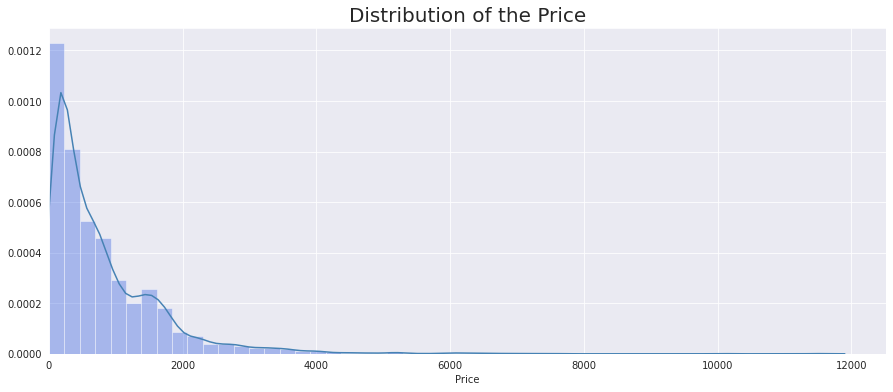

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(aus_df['price'], axlabel='Price', hist_kws={'color':'royalblue'}, kde_kws={'color':'steelblue'})
plt.xlim(0, None)
ax.set_title('Distribution of the Price', fontsize=20)

### Create a dataframe that has the outliers removed

Trimming off the outliers of the dataframe

In [0]:
starting_percentile_p = aus_df['price'].quantile(.01)
ending_percentile_p = aus_df['price'].quantile(.99)
print("Starting percentile: ", starting_percentile_p)
print("Ending percentile: ", ending_percentile_p)

Starting percentile:  52.730000000000004
Ending percentile:  4000.27


The outliers are loaded into a dataframe for future analysis. A summary of the dataframe contents can be found below.

In [0]:
aus_price_outliers_df = aus_df.loc[((aus_df['price'] <= starting_percentile_p) | (aus_df['price'] >= ending_percentile_p))]
aus_price_outliers_df['price'].describe()

count       80.000000
mean      2798.962500
std       2981.800889
min          1.000000
25%         45.000000
50%       2026.500000
75%       5158.750000
max      11500.000000
Name: price, dtype: float64

Create a dataframe that has the outliers removed

In [0]:
aus_df_trimmed = aus_df.loc[((aus_df['price'] > starting_percentile_p) & (aus_df['price'] < ending_percentile_p))]

Replot the graph with outliers removed

Text(0.5, 1.0, 'Distribution of the price with outliers removed')

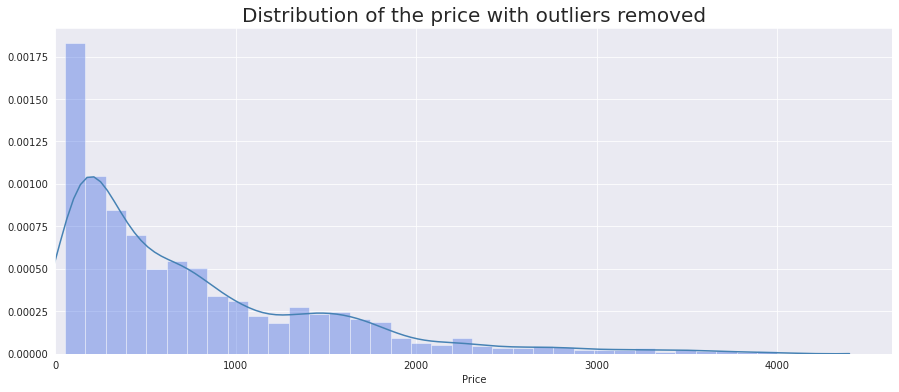

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(aus_df_trimmed['price'], axlabel='Price', hist_kws={'color':'royalblue'}, kde_kws={'color':'steelblue'})
plt.xlim(0, None)
ax.set_title('Distribution of the price with outliers removed', fontsize=20)

### Explore the distribution of the square meters variable

Text(0.5, 1.0, 'Distribution of the Square Meters')

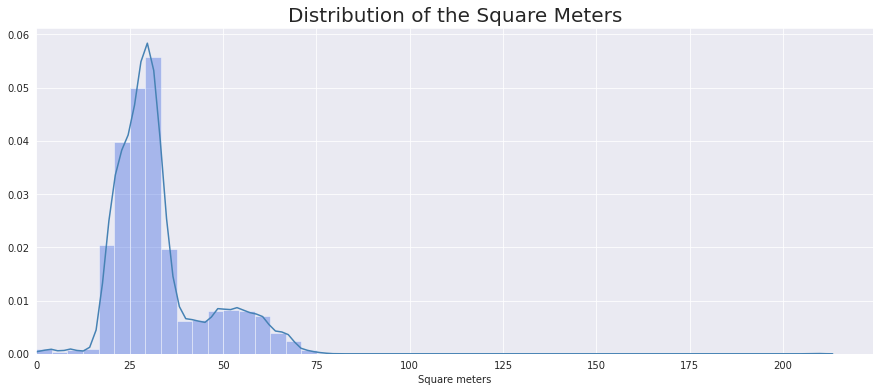

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(aus_df_trimmed['square_meters'], axlabel='Square meters', hist_kws={'color':'royalblue'}, kde_kws={'color':'steelblue'})
plt.xlim(0, None)
ax.set_title('Distribution of the Square Meters', fontsize=20)

### Create a dataframe that has the outliers removed

Trimming off the outliers of the dataframe

In [0]:
starting_percentile_sm = aus_df_trimmed['square_meters'].quantile(.01)
ending_percentile_sm = aus_df_trimmed['square_meters'].quantile(.99)
print("Starting percentile: ", starting_percentile_sm)
print("Ending percentile: ", ending_percentile_sm)

Starting percentile:  14.9888
Ending percentile:  67.70350000000002


The outliers are loaded into a dataframe for future analysis. A summary of the dataframe contents can be found below.

In [0]:
aus_price_outliers_df = aus_df_trimmed.loc[((aus_df_trimmed['square_meters'] <= starting_percentile_sm) | (aus_df_trimmed['square_meters'] >= ending_percentile_sm))]
aus_price_outliers_df['square_meters'].describe()

count     78.000000
mean      40.236410
std       37.158607
min        0.000000
25%        7.250000
50%       41.295000
75%       68.937500
max      208.700000
Name: square_meters, dtype: float64

Create a dataframe that has the outliers removed

In [0]:
aus_df_trimmed = aus_df_trimmed.loc[((aus_df_trimmed['square_meters'] > starting_percentile_sm) & (aus_df_trimmed['square_meters'] < ending_percentile_sm))]

Replot the graph with outliers removed

Text(0.5, 1.0, 'Distribution of the Square Meters with outliers removed')

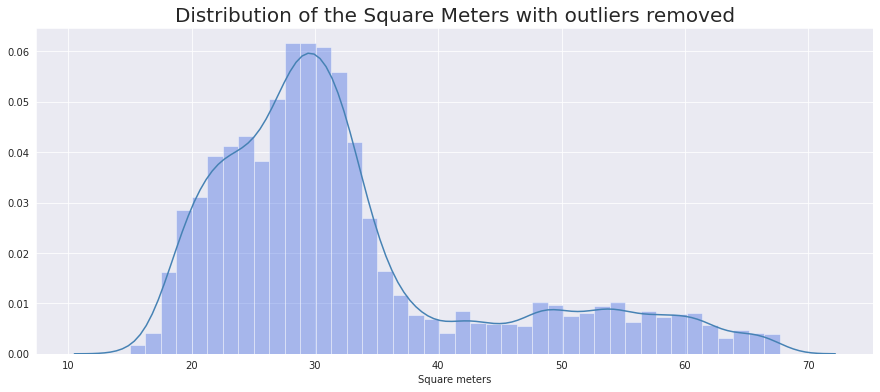

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(aus_df_trimmed['square_meters'], axlabel='Square meters', hist_kws={'color':'royalblue'}, kde_kws={'color':'steelblue'})
ax.set_title('Distribution of the Square Meters with outliers removed', fontsize=20)

### Iteratively explore the qualitative variables
Here are some find out:
*   There is only one unique entry for country, which suggests that we can probably drop it.
*   State has 8 unique entries, which needs additional investigation.
*   BYRON SHIRE COUNCIL seems to be the most popular neighborhood.
*   House seems to be the main property type.
*   Entire home/apt seems to be the main room type.






In [0]:
aus_df_trimmed[['country','state','neighbourhood_cleansed', 'property_type', 'room_type']].describe()

,country,state,neighbourhood_cleansed,property_type,room_type
count,3816,3628,3816,3816,3816
unique,1,8,5,8,3
top,Australia,NSW,BYRON SHIRE COUNCIL,House,Entire home/apt
freq,3816,3461,2445,2294,3113


Some of the below need to be fixed
*   'New South Wales', 'Nsw', and 'nsw' can all be collapsed to 'NSW'.
*   'Qld', 'Queensland', and 'queensland' can all be collapsed to 'QLD'.


In [0]:
pd.DataFrame(aus_df_trimmed.groupby('state').count()['country'].rename('count')).reset_index()

,state,count
0,NSW,3461
1,New South Wales,112
2,Nsw,4
3,QLD,44
4,Qld,2
5,Queensland,1
6,nsw,3
7,queensland,1


Apply the obvious fixes
*   Change the near NSW name to NSW
*   Change the near QLD name to QLD



In [0]:
aus_df_trimmed_cleaned = aus_df_trimmed.copy()
# Change the near NSW name to NSW
aus_df_trimmed_cleaned['state'].loc[aus_df_trimmed_cleaned['state'].isin(['New South Wales', 'Nsw', 'nsw'])]='NSW'
# Change the near QLD name to QLD
aus_df_trimmed_cleaned['state'].loc[aus_df_trimmed_cleaned['state'].isin(['Qld', 'Queensland', 'queensland'])]='QLD'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Output the dataframe to see its current state.

In [0]:
aus_df_trimmed_cleaned.head()

,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
2,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,141.0,Entire home/apt,1.0,1.0,1.0
8,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.93,65.0,Private room,1.0,1.0,1.0
10,Australia,NSW,BALLINA SHIRE COUNCIL,House,18.44,60.0,Private room,1.0,1.0,1.0
11,Australia,NSW,BALLINA SHIRE COUNCIL,House,18.06,60.0,Private room,1.0,1.0,1.0
12,Australia,NSW,BALLINA SHIRE COUNCIL,House,19.37,70.0,Private room,1.0,3.0,6.0


### Explore the neighbourhood_cleansed variable

Start with analyzing the frequency and distribution of the variable

The data below shows that the majority of the entries are in BYRON SHIRE COUNCIL and TWEED SHIRE COUNCIL

In [0]:
aus_df_trimmed_cleaned_nbhood_agg_full = pd.DataFrame(aus_df_trimmed_cleaned.groupby('neighbourhood_cleansed').count()['country'].rename('count')).reset_index().sort_values(by=['count'], ascending = False)
aus_df_trimmed_cleaned_nbhood_agg = aus_df_trimmed_cleaned_nbhood_agg_full.copy().head(5)
aus_df_trimmed_cleaned_nbhood_agg['cumpercentage'] = aus_df_trimmed_cleaned_nbhood_agg['count'].cumsum()/aus_df_trimmed_cleaned_nbhood_agg['count'].sum()*100
print("Records of neighbourhood_cleansed")
aus_df_trimmed_cleaned_nbhood_agg

Records of neighbourhood_cleansed


,neighbourhood_cleansed,count,cumpercentage
1,BYRON SHIRE COUNCIL,2445,64.072327
4,TWEED SHIRE COUNCIL,849,86.320755
0,BALLINA SHIRE COUNCIL,435,97.720126
2,LISMORE CITY COUNCIL,78,99.764151
3,RICHMOND VALLEY COUNCIL,9,100.000000


Plot the Neighbourhood_cleansed using a bar and pareto chart

The graph below makes it clear that BYRON SHIRE COUNCIL is the main neighbourhood, and the distribution of the listings is quite concentrated. 

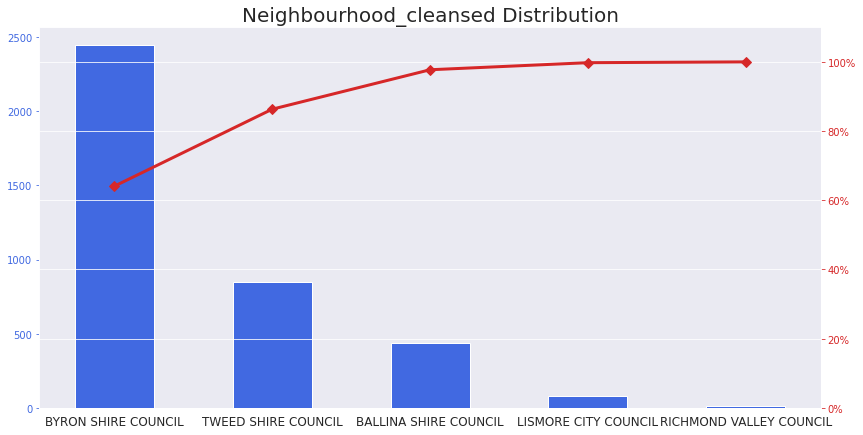

In [0]:
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(aus_df_trimmed_cleaned_nbhood_agg['neighbourhood_cleansed'], aus_df_trimmed_cleaned_nbhood_agg['count'], color='royalblue', width=0.5)
ax2 = ax.twinx()
ax2.plot(aus_df_trimmed_cleaned_nbhood_agg['neighbourhood_cleansed'], aus_df_trimmed_cleaned_nbhood_agg['cumpercentage'], color='C3', marker='D', ms=7, linewidth=3)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.grid(None)
ax.tick_params(axis='y', colors='royalblue')
ax2.tick_params(axis='y', colors='C3')
ax2.set_ylim((0,110))
ax.set_xticklabels(aus_df_trimmed_cleaned_nbhood_agg['neighbourhood_cleansed'], fontsize=12)
ax.set_title('Neighbourhood_cleansed Distribution', fontsize = 20)
plt.show()

### Explore the property_type variable

The data below shows that the majority of the entries are in Houses and Apartments.

In [0]:
aus_df_trimmed_cleaned_prop_type_agg = pd.DataFrame(aus_df_trimmed_cleaned.groupby('property_type').count()['country'].rename('count')).reset_index().sort_values(by=['count'], ascending = False)
aus_df_trimmed_cleaned_prop_type_agg['cumpercentage'] = aus_df_trimmed_cleaned_prop_type_agg['count'].cumsum()/aus_df_trimmed_cleaned_prop_type_agg['count'].sum()*100
aus_df_trimmed_cleaned_prop_type_agg.head(10)

,property_type,count,cumpercentage
4,House,2294,60.115304
0,Apartment,951,85.036688
2,Guest suite,254,91.692872
3,Guesthouse,211,97.222222
1,Camper/RV,42,98.322851
5,Loft,23,98.925577
6,Nature lodge,22,99.502096
7,Other,19,100.000000


### Plot the property_type using a bar and pareto chart

The graph below makes it clear that Houses and Apartments are the main entries, and the distribution of the listings is quite concentrated.

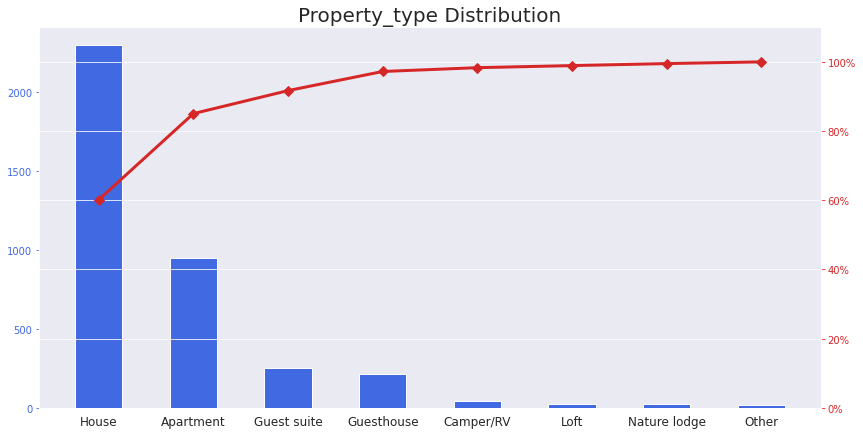

In [0]:
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(aus_df_trimmed_cleaned_prop_type_agg['property_type'], aus_df_trimmed_cleaned_prop_type_agg['count'], color='royalblue', width=0.5)
ax2 = ax.twinx()
ax2.plot(aus_df_trimmed_cleaned_prop_type_agg['property_type'], aus_df_trimmed_cleaned_prop_type_agg['cumpercentage'], color='C3', marker='D', ms=7, linewidth=3)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.grid(None)
ax.tick_params(axis='y', colors='royalblue')
ax2.tick_params(axis='y', colors='C3')
ax2.set_ylim((0,110))
ax.set_xticklabels(aus_df_trimmed_cleaned_prop_type_agg['property_type'], fontsize=12)
ax.set_title('Property_type Distribution', fontsize = 20)
plt.show()

### Explore the room_type variable

The data below shows that the majority of the entries are in Entire home/apt and Private room.

In [0]:
aus_df_trimmed_cleaned_room_type_agg = pd.DataFrame(aus_df_trimmed_cleaned.groupby('room_type').count()['country'].rename('count')).reset_index().sort_values(by=['count'], ascending = False)
aus_df_trimmed_cleaned_room_type_agg['cumpercentage'] = aus_df_trimmed_cleaned_room_type_agg['count'].cumsum()/aus_df_trimmed_cleaned_room_type_agg['count'].sum()*100
aus_df_trimmed_cleaned_room_type_agg.head()

,room_type,count,cumpercentage
0,Entire home/apt,3113,81.577568
1,Private room,700,99.921384
2,Shared room,3,100.000000


### Plot the room_type using a bar and pareto chart

The graph below makes it clear that Entire home/apt and private rooms are the main room type, and the distribution of the listings is quite concentrated.

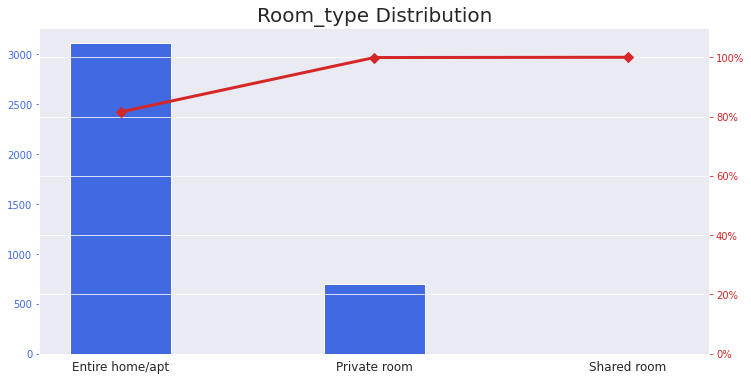

In [0]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(aus_df_trimmed_cleaned_room_type_agg['room_type'], aus_df_trimmed_cleaned_room_type_agg['count'], color='royalblue', width=0.4)
ax2 = ax.twinx()
ax2.plot(aus_df_trimmed_cleaned_room_type_agg['room_type'], aus_df_trimmed_cleaned_room_type_agg['cumpercentage'], color='C3', marker='D', ms=7, linewidth=3)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.grid(None)
ax.tick_params(axis='y', colors='royalblue')
ax2.tick_params(axis='y', colors='C3')
ax2.set_ylim((0,110))
ax.set_xticklabels(aus_df_trimmed_cleaned_room_type_agg['room_type'], fontsize=12)
ax.set_title('Room_type Distribution', fontsize = 20)
plt.show()

### Filter data and analyze price distributions per select categorical variables

Main entries for below variables
*   neighbourhood_cleansed - BYRON SHIRE COUNCIL, TWEED SHIRE COUNCIL, BALLINA SHIRE COUNCIL
*   property_type -  House, Apartment
*   room_type - Entire home/apt, Private room
*   price - All

In [0]:
#Perform final filters to focus on specific areas
aus_df_filtered = aus_df_trimmed.loc[(aus_df_trimmed['neighbourhood_cleansed'].isin(['BYRON SHIRE COUNCIL','TWEED SHIRE COUNCIL','BALLINA SHIRE COUNCIL']))]
aus_df_filtered = aus_df_filtered.loc[(aus_df_filtered['property_type'].isin(['House', 'Apartment']))]
aus_df_filtered = aus_df_filtered.loc[(aus_df_filtered['room_type'].isin(['Entire home/apt','Private room']))]
aus_df_filtered[['neighbourhood_cleansed','property_type', 'room_type']].describe()

,neighbourhood_cleansed,property_type,room_type
count,3181,3181,3181
unique,3,2,2
top,BYRON SHIRE COUNCIL,House,Entire home/apt
freq,2072,2239,2590


Text(0.5, 1.0, 'Boxplot of Price Distributions per Select Categorical Variables')

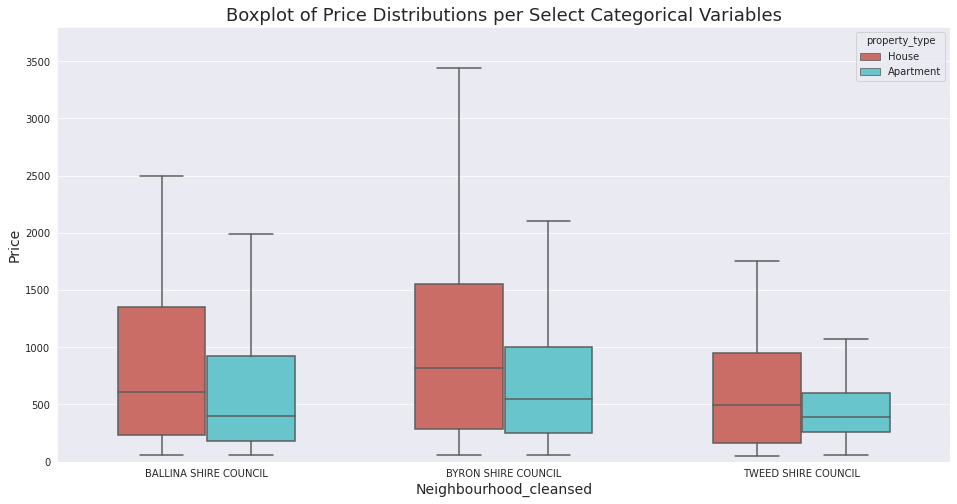

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(y='price', x = 'neighbourhood_cleansed', hue='property_type', data = aus_df_filtered, showfliers=False, palette=sns.color_palette('hls', 2), width=0.6)
plt.ylim([0,3800])
ax.set_xlabel('Neighbourhood_cleansed', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Boxplot of Price Distributions per Select Categorical Variables', fontsize=18)

## Summary of Findings 
*   The price range in Byron Shire Council is the biggest.
*   House and Apartment median listing prices in Byron Shire Council appear to be higher than other councils.
*   Byron Shire Council high-end pricing is higher than other councils, especially house prices.
*   Within each neighbourhoud category, houses are listed for higher values than apartments.

If I were to rent a property, as a Cost-performance ratio finding person, I might opt for an apartment in Byron Shire Council. The median price for it is much lower than the house in Byron Shire Council, and the price range is smaller, it may be a better choice.


# Part 2. Regression Analysis - BYRON SHIRE COUNCIL


### Perform light modifications

In [0]:
#Perform filters to focus on specific areas
aus_df_filtered = aus_df_trimmed.loc[(aus_df_trimmed['neighbourhood_cleansed'].isin(['BYRON SHIRE COUNCIL']))]
aus_df_filtered = aus_df_filtered.loc[(aus_df_filtered['property_type'].isin(['House']))]
aus_df_filtered = aus_df_filtered.loc[(aus_df_filtered['room_type'] == 'Entire home/apt')]

#Drop incomplete cases (e.g., those cases where state is null)
aus_df_filtered = aus_df_filtered.dropna()

# Show the filtered dataframe
aus_df_filtered.head(5)

,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
580,Australia,NSW,BYRON SHIRE COUNCIL,House,19.49,85.0,Entire home/apt,1.0,0.0,1.0
586,Australia,NSW,BYRON SHIRE COUNCIL,House,18.41,79.0,Entire home/apt,1.0,0.0,1.0
594,Australia,NSW,BYRON SHIRE COUNCIL,House,19.60,100.0,Entire home/apt,1.5,3.0,4.0
639,Australia,NSW,BYRON SHIRE COUNCIL,House,21.64,115.0,Entire home/apt,1.0,2.0,2.0
642,Australia,NSW,BYRON SHIRE COUNCIL,House,20.02,128.0,Entire home/apt,1.0,1.0,1.0


Column list:

*   country - The country in which the listing resides.
*   state - The state in which the listing resides.
*   neighbourhood_cleansed - A modified version of the neighborhood that can be used for grouping, only 'BYRON SHIRE COUNCIL' is included.
*   property_type - The type of property that is being listed, only 'House' is included.
*   square_meters - The area of the property that is being listed.
*   price - The cost of the rental per night in USD.
*   room_type - The type of room that is available for rent, only 'Entire home/apt' is included.
*  bathrooms - The count of bathrooms available (e.g., 1, 2, 1.5).
*  bedrooms - The count of bedrooms available (e.g., 0, 1, 2).
*  beds - The count of beds available in the rental (e.g., 1, 2, 3).

### Describe quantitative variables

In [0]:
aus_df_filtered.describe()

,square_meters,price,bathrooms,bedrooms,beds
count,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,29.988447,1293.271647,2.041596,3.192699,4.105263
std,3.542103,856.590077,0.927702,1.153936,1.916912
min,18.410000,79.000000,0.000000,0.000000,0.000000
25%,27.970000,653.500000,1.000000,3.000000,3.000000
50%,30.365000,1100.000000,2.000000,3.000000,4.000000
75%,32.577500,1712.000000,2.500000,4.000000,5.000000
max,37.650000,4000.000000,9.000000,12.000000,18.000000


### Describe qualitative variables

In [0]:
aus_df_filtered[['neighbourhood_cleansed','property_type', 'room_type']].describe()

,neighbourhood_cleansed,property_type,room_type
count,1178,1178,1178
unique,1,1,1
top,BYRON SHIRE COUNCIL,House,Entire home/apt
freq,1178,1178,1178


# Describe Regression approach I

Initially, I think that square meters is correlated with price. 

To guide my thinking, I will plot the results.
yˆ=θ0+θ1x1+θ2x2+⋯+θnxn

Text(0.5, 1.0, 'Scatter Plot of Square Meters and Price')

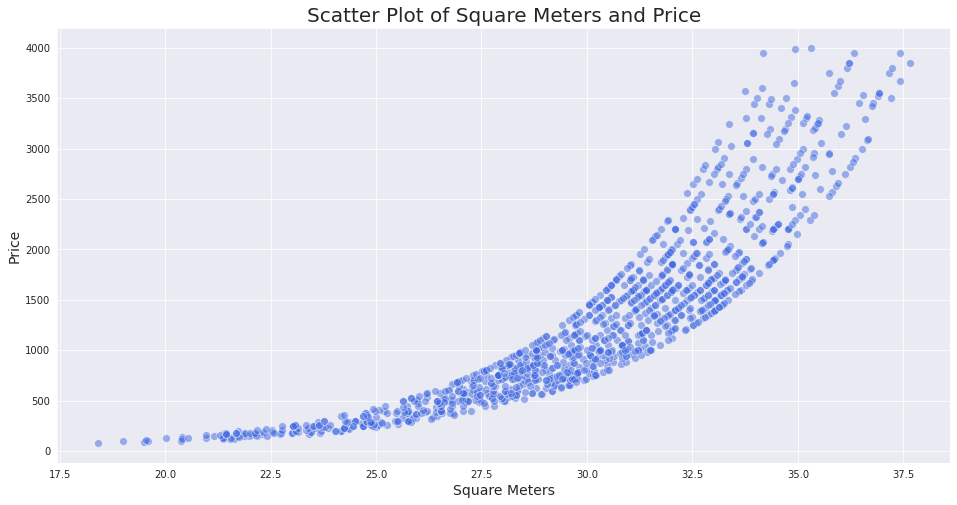

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aus_df_filtered, s=60, alpha=0.5, color='royalblue')
ax.set_xlabel('Square Meters', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Scatter Plot of Square Meters and Price', fontsize=20)

### Fit a line with Sci-Kit Learn 

In [0]:
X_cols = ['square_meters']

#Load the X data set
X = aus_df_filtered[X_cols].values

#Initialize the data and column length variables
data_length = len(aus_df_filtered)
column_length = len(aus_df_filtered[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = aus_df_filtered['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

### Take the results from above and print out a few pieces of information

In [0]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0   1367.732605
1   1121.797032
2   1113.316495
3   1706.954084
4    873.741324

Intercept: -5056.274170641345
   square_meters
0     212.013425

Mean Squared Error (MSE):147738.74
Variance Score (R^2):0.77


### Plot the graph using the results from Scikit-Learn

Text(0.5, 1.0, 'Regression Analysis of Square Meters and Price')

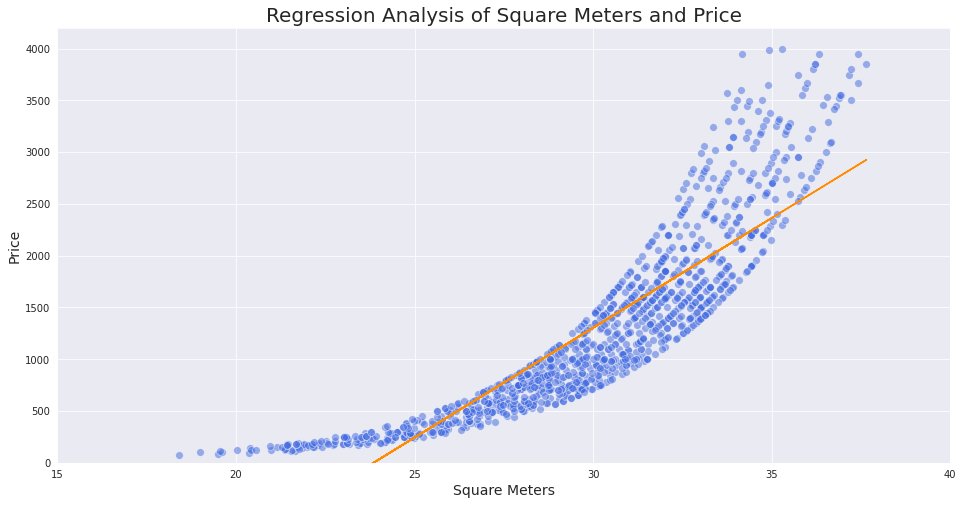

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aus_df_filtered, s=60, alpha=0.5, color='royalblue')
plt.plot(X_test, listing_y_pred, color='darkorange')
plt.xlim([15,40])
plt.ylim([0,4200])
ax.set_xlabel('Square Meters', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Regression Analysis of Square Meters and Price', fontsize=20)

## Intepret the results  


*   From the regression analysis, we can conclude that the rental price for the house will become higher when the square meters increase.
*   When the square meters are below 28, the price range is not as huge.
*   If I were to rent the house in BYRON SHIRE COUNCIL but I did not have much budget, I would choose the smaller place to rent. 


## How can this model be improved?  
*   The Variance Score of square meters and prices in Byron Shire Council is 0.77, which means that there is a positive correlation between square meters and prices. 
*   However, the mean square error is quite huge. The data might be underfitted or overfitted.
*   Perhaps the non-linear model can describe the distribution more acurate, but in this case, I think linear regression approach is enough to explore the correlation between square meters and prices in BYRON SHIRE COUNCIL. 


# Describe Regression approach II

I also think the more bedrooms the more bathrooms.

To guide my thinking, I will plot the results.
yˆ=θ0+θ1x1+θ2x2+⋯+θnxn

Text(0.5, 1.0, 'Scatter Plot of Bedrooms and Bathrooms')

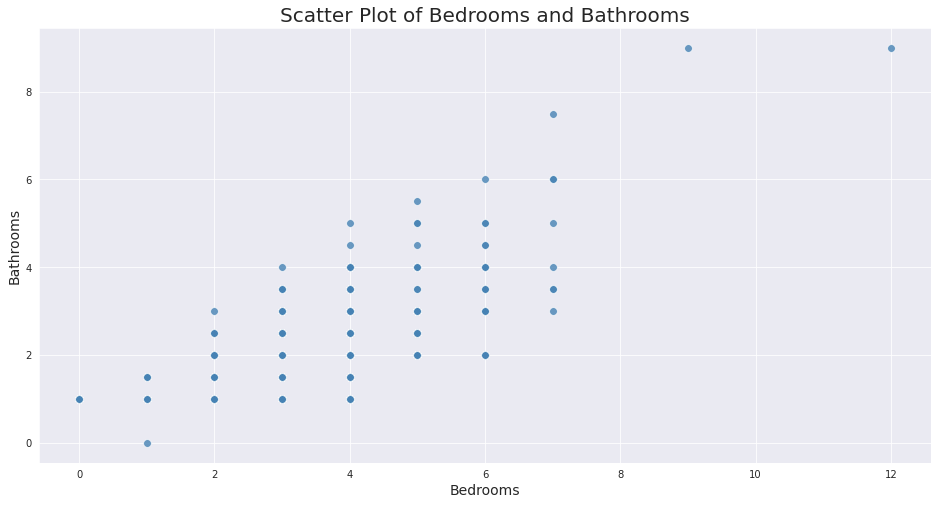

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x = 'bedrooms', y = 'bathrooms', data = aus_df_filtered, s=60, alpha=0.8, color='steelblue')
ax.set_xlabel('Bedrooms', fontsize = 14)
ax.set_ylabel('Bathrooms', fontsize = 14)
ax.set_title('Scatter Plot of Bedrooms and Bathrooms', fontsize=20)

### Fit a line with Sci-Kit Learn

In [0]:
X_cols1 = ['bedrooms']

#Load the X data set
X1 = aus_df_filtered[X_cols1].values

#Initialize the data and column length variables
data_length1 = len(aus_df_filtered)
column_length1 = len(aus_df_filtered[X_cols1].columns)

#Reshape and load remaining data sets
X1 = X1.reshape(data_length1,column_length1)
y1 = aus_df_filtered['bathrooms'].values
y1 = y1.reshape(data_length1,1)

#Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1)

#Create the linear regression object and train/fit models
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train1, y_train1)

#Make predictions using the testing set
listing_y_pred1 = lin_reg1.predict(X_test1)

### Take the results from above and print out a few pieces of information

In [0]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred1, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg1.intercept_))

#Print the coefficient(s)
coeff_df1 = pd.DataFrame(lin_reg1.coef_)
coeff_df1.columns = X_cols1
print(coeff_df1)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test1, listing_y_pred1))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test1, listing_y_pred1))

   y_prediction
0      3.019639
1      1.910855
2      1.356462
3      2.465247
4      1.910855

Intercept: 0.2476778012458032
   bedrooms
0  0.554392

Mean Squared Error (MSE):0.50
Variance Score (R^2):0.51


### Plot the graph using the results from Scikit-Learn

Text(0.5, 1.0, 'Regression Analysis of Bedrooms and Bathrooms')

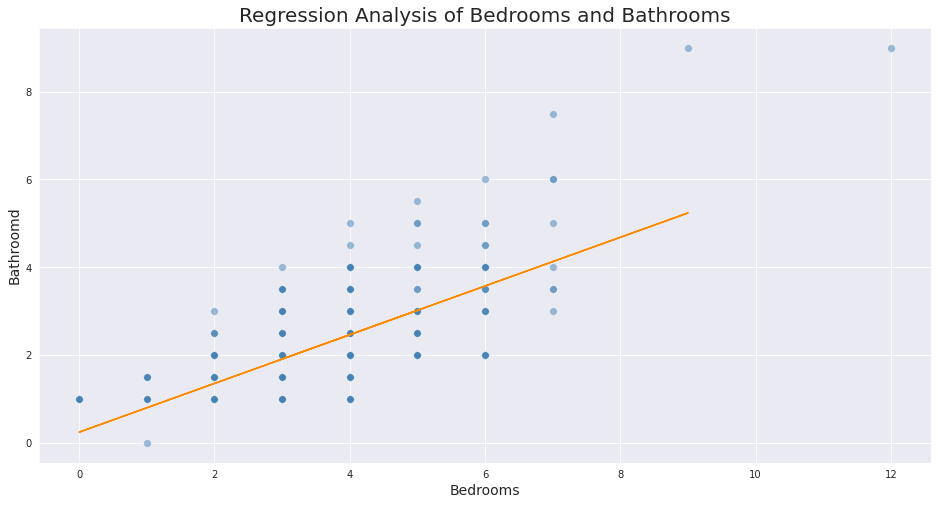

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x = 'bedrooms', y = 'bathrooms', data = aus_df_filtered, s=60, alpha=0.5, color='steelblue')
plt.plot(X_test1, listing_y_pred1, color='darkorange')
ax.set_xlabel('Bedrooms', fontsize = 14)
ax.set_ylabel('Bathroomd', fontsize = 14)
ax.set_title('Regression Analysis of Bedrooms and Bathrooms', fontsize=20)

## Interpret the result
*   From above, it seems that the more bedrooms in the houses will also have more bathrooms.
*   The Variance Score is 0.44, representing a medium positive correlation between them.






# Describe Regression approach III
### Repeat the previous analysis with a few more variables

In [0]:
X_cols2 = ['square_meters', 'bathrooms', 'bedrooms']

#Load the X data set
X2 = aus_df_filtered[X_cols2].values

#Initialize the data and column length variables
data_length2 = len(aus_df_filtered)
column_length2 = len(aus_df_filtered[X_cols2].columns)

#Reshape and load remaining data sets
X2 = X2.reshape(data_length2,column_length2)
y2 = aus_df_filtered['price'].values
y2 = y2.reshape(data_length2,1)

#Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2)

#Create the linear regression object and train/fit models
lin_reg2= LinearRegression()
lin_reg2.fit(X_train2, y_train2)

#Make predictions using the testing set
listing_y_pred2 = lin_reg2.predict(X_test2)

### Take the results from above and print out a few pieces of information 


In [0]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred2, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg2.intercept_))

#Print the coefficient(s)
coeff_df2 = pd.DataFrame(lin_reg2.coef_)
coeff_df2.columns = X_cols2
print(coeff_df2)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test2, listing_y_pred2))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test2, listing_y_pred2))

   y_prediction
0   1537.689985
1    -92.803531
2   1667.725010
3   1076.025327
4   1535.114977

Intercept: -4804.4058319046
   square_meters  bathrooms   bedrooms
0     192.134473  84.464674  51.222644

Mean Squared Error (MSE):140258.62
Variance Score (R^2):0.81


# Summary 


*   From the analysis above in BYRON SHIRE COUNCIL, when I add 'bathrooms' and 'bedrooms' variables into consideration, the variance score have almost the same outcome as that of only 'square meters' variable.
*   We can conclude that the rental price will be influenced by the factors of 'square meters', 'bathrooms', and 'bedrooms'. 
*   The relationship among 'price'and 'squares meters', 'bathrooms', 'bedrooms' is positive. 
*   The mean squared error increased, which means that when I take more variables into consideration, my accuracy decrease. Using non-linear approach may lead to a more accurate outcome.

















# Additional regression approach I - TWEED SHIRE COUNCIL
I also want to investage the correlation between square meters and prices in TWEED SHIRE COUNCIL. 

To find out if the result in TWEED SHIRE COUNCIL will be similiar to the result in BYRON SHIRE COUNCIL. 


Perform light modifications: 

In [0]:
#Perform filters to focus on specific areas
aus_df_filtered_v = aus_df_trimmed.loc[(aus_df_trimmed['neighbourhood_cleansed'].isin(['TWEED SHIRE COUNCIL']))]
aus_df_filtered_v = aus_df_filtered_v.loc[(aus_df_filtered_v['property_type'].isin(['House']))]
aus_df_filtered_v = aus_df_filtered_v.loc[(aus_df_filtered_v['room_type'] == 'Entire home/apt')]

#Drop incomplete cases (e.g., those cases where state is null)
aus_df_filtered_v = aus_df_filtered_v.dropna()

# Show the filtered dataframe
aus_df_filtered_v.head(5)

,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
3105,Australia,NSW,TWEED SHIRE COUNCIL,House,15.10,1751.0,Entire home/apt,2.0,3.0,3.0
3107,Australia,NSW,TWEED SHIRE COUNCIL,House,16.07,1745.0,Entire home/apt,1.0,3.0,3.0
3108,Australia,NSW,TWEED SHIRE COUNCIL,House,15.36,1750.0,Entire home/apt,2.0,4.0,4.0
3110,Australia,NSW,TWEED SHIRE COUNCIL,House,18.26,1725.0,Entire home/apt,3.0,4.0,5.0
3111,Australia,NSW,TWEED SHIRE COUNCIL,House,21.34,1700.0,Entire home/apt,3.0,4.0,3.0


Column list:

*   country - The country in which the listing resides.
*   state - The state in which the listing resides.
*   neighbourhood_cleansed - A modified version of the neighborhood that can be used for grouping, only 'TWEED SHIRE COUNCIL' is included.
*   property_type - The type of property that is being listed, only 'House' is included.
*   square_meters - The area of the property that is being listed.
*   price - The cost of the rental per night in USD.
*   room_type - The type of room that is available for rent, only 'Entire home/apt' is included.
*  bathrooms - The count of bathrooms available (e.g., 1, 2, 1.5).
*  bedrooms - The count of bedrooms available (e.g., 0, 1, 2).
*  beds - The count of beds available in the rental (e.g., 1, 2, 3).

### Describe quantitative variables

In [0]:
aus_df_filtered_v.describe()

,square_meters,price,bathrooms,bedrooms,beds
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,48.520974,793.917603,2.097378,3.322097,4.456929
std,12.569352,493.115644,0.780322,1.055419,1.929446
min,15.100000,78.000000,1.000000,0.000000,0.000000
25%,38.865000,360.000000,1.500000,3.000000,3.000000
50%,51.680000,680.000000,2.000000,3.000000,4.000000
75%,58.485000,1250.000000,2.500000,4.000000,6.000000
max,67.700000,1751.000000,4.000000,6.000000,13.000000


### Describe qualitative variables

In [0]:
aus_df_filtered_v[['neighbourhood_cleansed','property_type', 'room_type']].describe()

,neighbourhood_cleansed,property_type,room_type
count,267,267,267
unique,1,1,1
top,TWEED SHIRE COUNCIL,House,Entire home/apt
freq,267,267,267


### Describe Regression approach

I think that square meters will be correlated with price just as the previous investigation.

To guide my thinking, I will plot the results. yˆ=θ0+θ1x1+θ2x2+⋯+θnxn

Text(0.5, 1.0, 'Scatter Plot of Square Meters and Price')

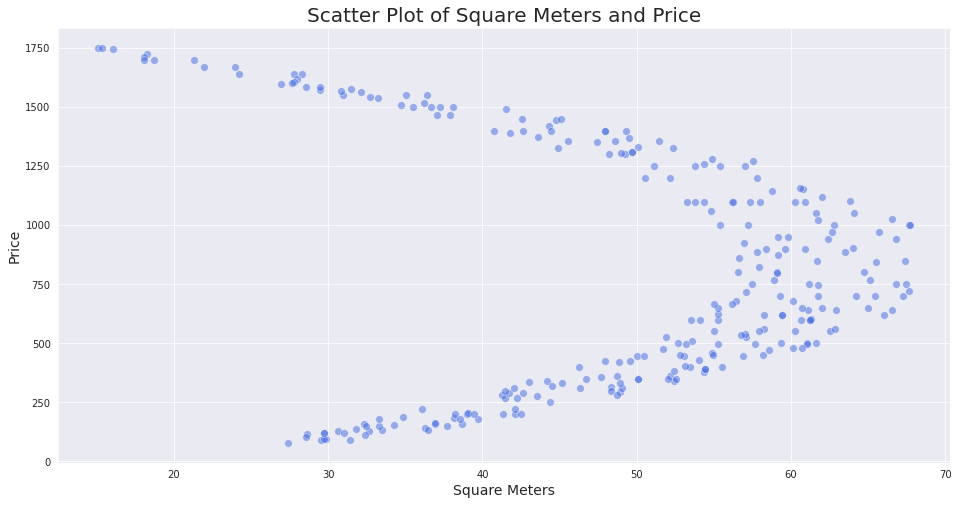

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aus_df_filtered_v, s=60, alpha=0.5, color='royalblue')
ax.set_xlabel('Square Meters', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Scatter Plot of Square Meters and Price', fontsize=20)

### Fit a line with Sci-Kit Learn

In [0]:
X_cols3 = ['square_meters']

#Load the X data set
X3 = aus_df_filtered_v[X_cols3].values

#Initialize the data and column length variables
data_length3 = len(aus_df_filtered_v)
column_length3 = len(aus_df_filtered_v[X_cols3].columns)

#Reshape and load remaining data sets
X3 = X3.reshape(data_length3,column_length3)
y3 = aus_df_filtered_v['price'].values
y3 = y3.reshape(data_length3,1)

#Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3)

#Create the linear regression object and train/fit models
lin_reg3 = LinearRegression()
lin_reg3.fit(X_train3, y_train3)

#Make predictions using the testing set
listing_y_pred3 = lin_reg3.predict(X_test3)

### Take the results from above and print out a few pieces of information

In [0]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred3, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg3.intercept_))

#Print the coefficient(s)
coeff_df3 = pd.DataFrame(lin_reg3.coef_)
coeff_df3.columns = X_cols3
print(coeff_df3)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test3, listing_y_pred3))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test3, listing_y_pred3))

   y_prediction
0    867.099503
1    702.668813
2    662.264973
3    732.191769
4    741.170400

Intercept: 1137.2193327831667
   square_meters
0      -7.609009

Mean Squared Error (MSE):213635.50
Variance Score (R^2):-0.05


### Plot the graph using the results from Scikit-Learn

Text(0.5, 1.0, 'Regression Analysis of Square Meters and Price')

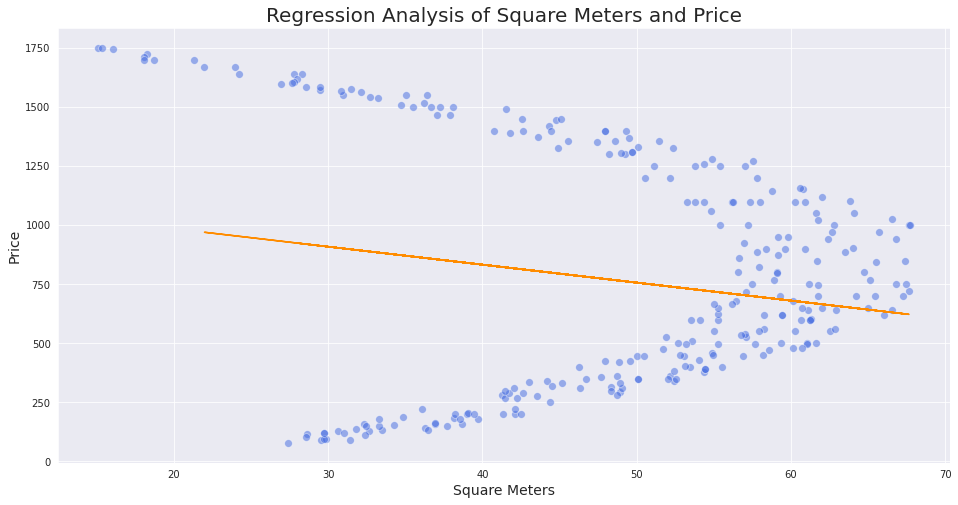

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aus_df_filtered_v, s=60, alpha=0.5, color='royalblue')
plt.plot(X_test3, listing_y_pred3, color='darkorange')
ax.set_xlabel('Square Meters', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Regression Analysis of Square Meters and Price', fontsize=20)

## Intepret the results
*   From this regression analysis, we can not conclude that the rental price for the house will become higher when the square meters increase.
*   The trend of price is discrete, we cannot find any correlation between square meters and prices.


## How can this model be improved?
*   The Variance Score of square meters and prices in TWEED SHIRE COUNCIL is only -0.06, which means that there is non correlation between square meters and prices.
*   For this analysis, we cannot use linear regression approach. The result will be underfitted for sure. Maybe we can use cluster approach to get the  outcome.

### Describe Regression approach 

Repeat the previous analysis with a few more variables

In [0]:
X_cols4 = ['square_meters', 'bathrooms', 'bedrooms']

#Load the X data set
X4 = aus_df_filtered_v[X_cols4].values

#Initialize the data and column length variables
data_length4 = len(aus_df_filtered_v)
column_length4 = len(aus_df_filtered_v[X_cols4].columns)

#Reshape and load remaining data sets
X4 = X4.reshape(data_length4,column_length4)
y4 = aus_df_filtered_v['price'].values
y4 = y4.reshape(data_length4,1)

#Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4)

#Create the linear regression object and train/fit models
lin_reg4= LinearRegression()
lin_reg4.fit(X_train4, y_train4)

#Make predictions using the testing set
listing_y_pred4 = lin_reg4.predict(X_test4)

### Take the results from above and print out a few pieces of information 


In [0]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred4, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg4.intercept_))

#Print the coefficient(s)
coeff_df4 = pd.DataFrame(lin_reg4.coef_)
coeff_df4.columns = X_cols4
print(coeff_df4)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test4, listing_y_pred4))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test4, listing_y_pred4))

   y_prediction
0    898.530768
1    804.219393
2    322.494406
3    670.875877
4    544.901437

Intercept: 338.27329941524766
   square_meters   bathrooms    bedrooms
0      -8.664296  239.222238  108.298252

Mean Squared Error (MSE):163531.26
Variance Score (R^2):0.31


# Summary 

*   From the analysis above in TWEED SHIRE COUNCIL, when I add 'bathrooms' and 'bedrooms' variables into consideration, the variance score is still small, which means that there is only little correlation among them.
*   We can not conclude that the rental price will be influenced by the factors of 'square meters', 'bathrooms', and 'bedrooms' in TWEED SHIRE COUNCIL. 
*   For the analysis in TWEED SHIRE COUNCIL, it's better to use non-linear approach to conduct the analysis. 

















# Additional regression approach II - BALLINA SHIRE COUNCIL

I also want to investage the correlation between square meters and prices in BALLINA SHIRE COUNCIL. 

To find out if the result in BALLINA SHIRE COUNCIL
 will be similiar to the result in BYRON SHIRE COUNCIL or TWEED SHIRE COUNCIL. 


Perform light modifications: 

In [0]:
#Perform filters to focus on specific areas
aus_df_filtered_v2 = aus_df_trimmed.loc[(aus_df_trimmed['neighbourhood_cleansed'].isin(['BALLINA SHIRE COUNCIL']))]
aus_df_filtered_v2 = aus_df_filtered_v2.loc[(aus_df_filtered_v2['property_type'].isin(['House']))]
aus_df_filtered_v2 = aus_df_filtered_v2.loc[(aus_df_filtered_v2['room_type'] == 'Entire home/apt')]

#Drop incomplete cases (e.g., those cases where state is null)
aus_df_filtered_v2 = aus_df_filtered_v2.dropna()

# Show the filtered dataframe
aus_df_filtered_v2.head(5)

,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
30,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.71,75.0,Entire home/apt,1.0,2.0,2.0
48,Australia,NSW,BALLINA SHIRE COUNCIL,House,20.28,89.0,Entire home/apt,1.0,1.0,1.0
51,Australia,NSW,BALLINA SHIRE COUNCIL,House,20.14,105.0,Entire home/apt,2.0,3.0,3.0
63,Australia,NSW,BALLINA SHIRE COUNCIL,House,21.43,136.0,Entire home/apt,1.0,1.0,1.0
78,Australia,NSW,BALLINA SHIRE COUNCIL,House,23.96,150.0,Entire home/apt,1.5,2.0,3.0


Column list:

*   country - The country in which the listing resides.
*   state - The state in which the listing resides.
*   neighbourhood_cleansed - A modified version of the neighborhood that can be used for grouping, only 'BALLINA SHIRE COUNCIL' is included.
*   property_type - The type of property that is being listed, only 'House' is included.
*   square_meters - The area of the property that is being listed.
*   price - The cost of the rental per night in USD.
*   room_type - The type of room that is available for rent, only 'Entire home/apt' is included.
*  bathrooms - The count of bathrooms available (e.g., 1, 2, 1.5).
*  bedrooms - The count of bedrooms available (e.g., 0, 1, 2).
*  beds - The count of beds available in the rental (e.g., 1, 2, 3).

### Describe quantitative variables

In [0]:
aus_df_filtered_v2.describe()

,square_meters,price,bathrooms,bedrooms,beds
count,184.000000,184.000000,184.000000,184.000000,184.000000
mean,38.382717,930.733696,2.043478,3.190217,4.157609
std,11.221598,675.741810,0.833559,1.215434,1.936745
min,17.710000,75.000000,1.000000,0.000000,1.000000
25%,28.752500,358.750000,1.500000,2.750000,3.000000
50%,37.585000,774.500000,2.000000,3.000000,4.000000
75%,48.217500,1430.250000,2.500000,4.000000,5.000000
max,66.190000,3418.000000,5.000000,7.000000,11.000000


### Describe qualitative variables

In [0]:
aus_df_filtered_v2[['neighbourhood_cleansed','property_type', 'room_type']].describe()

,neighbourhood_cleansed,property_type,room_type
count,184,184,184
unique,1,1,1
top,BALLINA SHIRE COUNCIL,House,Entire home/apt
freq,184,184,184


### Describe Regression approach
I think that square meters will be correlated with price just as the previous investigation.

To guide my thinking, I will plot the results. yˆ=θ0+θ1x1+θ2x2+⋯+θnxn

Text(0.5, 1.0, 'Scatter Plot of Square Meters and Price')

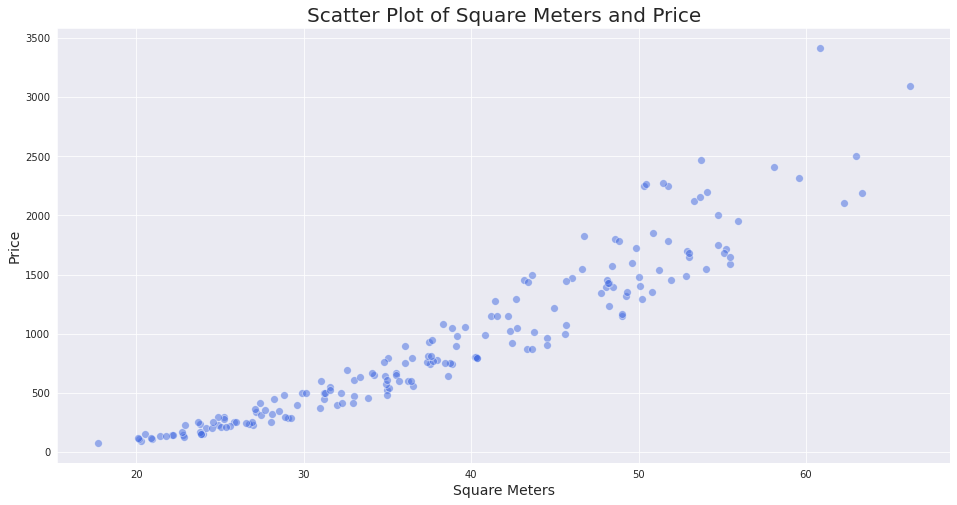

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aus_df_filtered_v2, s=60, alpha=0.5, color='royalblue')
ax.set_xlabel('Square Meters', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Scatter Plot of Square Meters and Price', fontsize=20)

### Fit a line with Sci-Kit Learn

In [0]:
X_cols5 = ['square_meters']

#Load the X data set
X5 = aus_df_filtered_v2[X_cols5].values

#Initialize the data and column length variables
data_length5 = len(aus_df_filtered_v2)
column_length5 = len(aus_df_filtered_v2[X_cols5].columns)

#Reshape and load remaining data sets
X5 = X5.reshape(data_length5,column_length5)
y5 = aus_df_filtered_v2['price'].values
y5 = y5.reshape(data_length5,1)

#Split the data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5)

#Create the linear regression object and train/fit models
lin_reg5 = LinearRegression()
lin_reg5.fit(X_train5, y_train5)

#Make predictions using the testing set
listing_y_pred5 = lin_reg5.predict(X_test5)

### Take the results from above and print out a few pieces of information

In [0]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred5, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg5.intercept_))

#Print the coefficient(s)
coeff_df5 = pd.DataFrame(lin_reg5.coef_)
coeff_df5.columns = X_cols5
print(coeff_df5)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test5, listing_y_pred5))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test5, listing_y_pred5))

   y_prediction
0   1311.573876
1    807.228953
2   -123.379970
3   1707.183885
4    129.949246

Intercept: -1287.0749066834655
   square_meters
0      57.837721

Mean Squared Error (MSE):36291.78
Variance Score (R^2):0.90


### Plot the graph using the results from Scikit-Learn

Text(0.5, 1.0, 'Regression Analysis of Square Meters and Price')

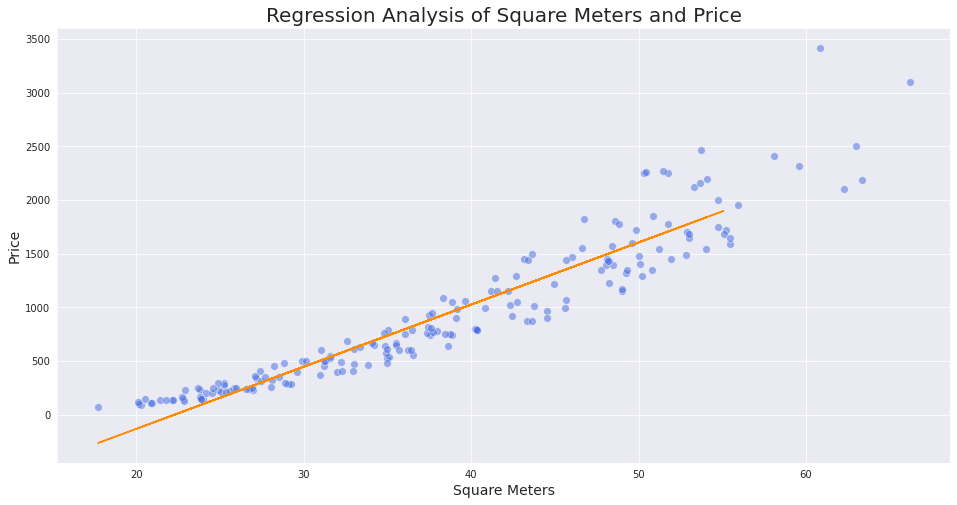

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = aus_df_filtered_v2, s=60, alpha=0.5, color='royalblue')
plt.plot(X_test5, listing_y_pred5, color='darkorange')
ax.set_xlabel('Square Meters', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Regression Analysis of Square Meters and Price', fontsize=20)

## Intepret the results

*   From the regression analysis, we can conclude that the rental price for the house will become higher when the square meters increase.
*   The price will not suddenly increase when the square meters increase, the price increasement trend is quite gentle.


## How can this model be improved?
*   The Variance Score of square meters and prices in BALLINA SHIRE COUNCIL is 0.88, which means that there is a strong positive correlation between square meters and prices. 
*   I think linear regression approach is a good way for this analysis.


### Describe Regression approach
Repeat the previous analysis with a few more variables

In [0]:
X_cols6 = ['square_meters', 'bathrooms', 'bedrooms']

#Load the X data set
X6 = aus_df_filtered_v2[X_cols6].values

#Initialize the data and column length variables
data_length6 = len(aus_df_filtered_v2)
column_length6 = len(aus_df_filtered_v2[X_cols6].columns)

#Reshape and load remaining data sets
X6 = X6.reshape(data_length6,column_length6)
y6 = aus_df_filtered_v2['price'].values
y6 = y6.reshape(data_length6,1)

#Split the data into training and testing sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6)

#Create the linear regression object and train/fit models
lin_reg6= LinearRegression()
lin_reg6.fit(X_train6, y_train6)

#Make predictions using the testing set
listing_y_pred6 = lin_reg6.predict(X_test6)

### Take the results from above and print out a few pieces of information

In [0]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred6, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg6.intercept_))

#Print the coefficient(s)
coeff_df6 = pd.DataFrame(lin_reg6.coef_)
coeff_df6.columns = X_cols6
print(coeff_df6)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test6, listing_y_pred6))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test6, listing_y_pred6))

   y_prediction
0   1065.379146
1   1403.818641
2   1677.782939
3    920.027316
4    807.157829

Intercept: -1313.6778054010408
   square_meters  bathrooms   bedrooms
0      54.115361  33.241987  32.173876

Mean Squared Error (MSE):46558.16
Variance Score (R^2):0.89


# Summary


*   From the analysis above in BALLINA SHIRE COUNCIL, when I add 'bathrooms' and 'bedrooms' variables into consideration, the variance score have almost the same outcome as that of only 'square meters' variable.
*   We can conclude that the rental price will be influenced by the factors of 'square meters', 'bathrooms', and 'bedrooms'. 
*   The relationship among 'price'and 'squares meters', 'bathrooms', 'bedrooms' is strongly positive. 
*   The mean squared error increased, which means that when I take more variables into consideration, my accuracy decrease. Using non-linear approach may lead to a more accurate outcome.

# Conclusion



### 1.   If I were going to rent a house...
*   From the whole analysis, if I were going to rent a house, I would choose to live in BYRON SHIRE COUNCIL. The reason is that the data are ample, and the price trend is quite gentle. I believe it would be easier to find out my ideal house there, and the price range in the same square meters is not so huge, which I believe the quality of the house may be similiar.
*   I would less likely to choose the house in Tweed Shire Council, the price there is hard to predict. There are many different prices in the same square meters houses, it would took me a lot of time to compare the diffence between them. I were also worried about if I choose the cheaper one, the house quality would be bad. Compare to the hosue in BYRON SHIRE COUNCIL, which is more predictable and the price tread is gentle, which I think would be easier for me to find out my ideal house. I also think that there are other uncertainly and unknown factors that influence the house price in Tweed Shire Council, which needs further investigation.
*  I whould not choose to rent the house in BALLINA SHIRE COUNCIL either. The reason is that the data pool is not big, though the price trend is quite gentle, I still worried that the analysis is not accurate. If we can have more data of BALLINA SHIRE COUNCIL, it would be better, and the analysis outcome would be more convincing.


### 2.   Linear Regression or Classification?
*   For BYRON SHIRE COUNCIL, I think linear regression is enough for the prediction.
*   For Tweed Shire Council, it's better using non-linear. Using linear regression will underfit the result.
*   For BALLINA SHIRE COUNCIL, I think linear regression is ok... but the data set is too small, I cannot conclude that linear regression approach is enough for the analysis.








